In [1]:
from sklearn.datasets import fetch_california_housing
import torch
import pandas as pd
from torch import optim

In [2]:
url = "/Users/karollvivianalopezvillegas/GitHub/DA_FT_ExtraWeek11/marketing_customer_analysis_clean.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head(3)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2


In [5]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [6]:
# drop some columns: customer, month, 'unnamed:_0'

In [7]:
df.drop(columns = ['unnamed:_0', "month", "customer"], inplace = True)

In [8]:
df.head(3)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [9]:
df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [10]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
df.nunique()

state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            37
months_since_policy_inception     100
number_of_open_complaints           7
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
vehicle_type                        1
dtype: int64

In [13]:
df.location_code.value_counts()

location_code
Suburban    6902
Rural       2116
Urban       1892
Name: count, dtype: int64

In [14]:
df.coverage.value_counts()

coverage
Basic       6660
Extended    3265
Premium      985
Name: count, dtype: int64

In [15]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [22]:
df_dummies.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,True,False,...,False,True,False,False,False,False,False,False,True,False
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
features = df_dummies.drop(columns = "customer_lifetime_value")

In [19]:
target = df_dummies["customer_lifetime_value"]

# Split the Data

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 42)

# Standarize Data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
lin_reg = LinearRegression()

In [40]:
lin_reg.fit(X_train_scaled , y_train)

LinearRegression()

In [41]:
pred = lin_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_scaled, y_test))

MAE 3920.079557423556
RMSE 6160.251866733146
R2 score 0.10733130643042321


# Neuronal Network Model

In [45]:
import numpy as np

In [46]:
y_train = np.array(y_train)

y_test = np.array(y_test)

In [47]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [49]:
from torch import nn

In [50]:
import torch.nn as nn
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size,hidden_size),
                                    nn.Linear(hidden_size,output_size))
    def forward(self, x):
        return self.network(x)

In [59]:
len(features.columns)

108

In [60]:
features.columns

Index(['income', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'state_California',
       'state_Nevada', 'state_Oregon',
       ...
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Luxury Car',
       'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car',
       'vehicle_size_Medsize', 'vehicle_size_Small'],
      dtype='object', length=108)

In [132]:
input_size = 108
hidden_size = 360
output_size = 1

model = SimpleNN(input_size, hidden_size, output_size)

In [135]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training the model
epochs = 5000
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [50/5000], Loss: 38952092.0000
Epoch [100/5000], Loss: 38949732.0000
Epoch [150/5000], Loss: 38949720.0000
Epoch [200/5000], Loss: 38949716.0000
Epoch [250/5000], Loss: 38949712.0000
Epoch [300/5000], Loss: 38949712.0000
Epoch [350/5000], Loss: 38949712.0000
Epoch [400/5000], Loss: 38949716.0000
Epoch [450/5000], Loss: 38949732.0000
Epoch [500/5000], Loss: 38949816.0000
Epoch [550/5000], Loss: 38949716.0000
Epoch [600/5000], Loss: 38949752.0000
Epoch [650/5000], Loss: 38949720.0000
Epoch [700/5000], Loss: 38949872.0000
Epoch [750/5000], Loss: 38949716.0000
Epoch [800/5000], Loss: 38950296.0000
Epoch [850/5000], Loss: 38949724.0000
Epoch [900/5000], Loss: 38950484.0000
Epoch [950/5000], Loss: 38949752.0000
Epoch [1000/5000], Loss: 38952992.0000
Epoch [1050/5000], Loss: 38949988.0000
Epoch [1100/5000], Loss: 38949932.0000
Epoch [1150/5000], Loss: 38951732.0000
Epoch [1200/5000], Loss: 38949836.0000
Epoch [1250/5000], Loss: 38956696.0000
Epoch [1300/5000], Loss: 38949724.0000
Epoch 

# Model Evaluation

Test Loss: 37999144.0000


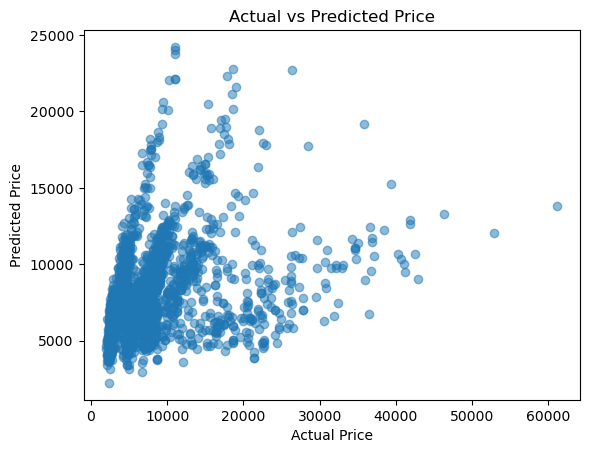

In [136]:
model.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


In [137]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    actuals = y_test_tensor.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

R2 score: 0.1061
